# Grundlagen der Multimediatechnik
## Wintersemester 2021/2022

## Übungslatt 4
<b>Wichtig</b>: Bitte kennzeichnen Sie Ihre Abgabe mit Ihrem Namen und dem Namen Ihres Übungspartners. <br>
Laden Sie bitte Ihre Abgabe als PDF-/ZIP-Datei auf der ILIAS-Plattform hoch. Andere Dateiformate sowie Scans von handgeschriebenen Abgaben werden nicht gewertet. Achten Sie darauf, nur kompilierbaren, kommentierten Code abzugeben. Nicht-kompilierbarer Code wird mit <b>0 Punkten</b> bewertet! \\
Alle Abgaben müussen folgender Namenskonvention entsprechen:  `gmt_uebungXX_nachname1_nachname2.format` <br>
Im Falle Ihres Notebooks: `gmt_uebungXX_nachname1_nachmame2.ipynb`

In [3]:
# imports

import numpy as np
import cv2
import matplotlib.pyplot as plt

### Aufgabe 3 - Histogramm und Kontrasterhöhung 2 (16 Punkte)
Auf ILIAS finden Sie das Bild `oilwagon.jpg`. Bearbeiten Sie die folgenden Aufgaben, wobei das `oilwagon.jpg` als Input dient. <br>
1. Programmieren Sie als ersten Schritt die Histogrammerzeugung des oben genannten Bildes (als Datenstruktur). Berechnen Sie dafür die Anzahl der Pixel eines Bildes nach Grauwert sortiert. Plotten Sie anschließend Ihr berechnetes Histogramm.

In [4]:
img_wagon = plt.imread("oilwagon.jpg")
height, width = img_wagon.shape

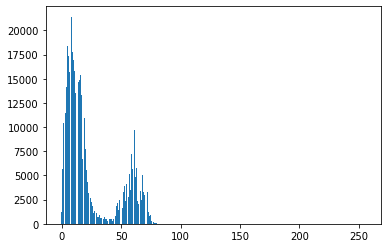

In [5]:
# TODO

"""
calculate histogram of given grayscale img
"""
def getHistogram(img):
    hist = np.zeros(256, dtype=int)
    h, w = img.shape

    for row in range(h):
        for col in range(w):
            valueInImg = img[row][col]
            hist[valueInImg] += 1
    return hist

pixels = np.arange(256)

histogram = getHistogram(img_wagon)
plt.bar(pixels, histogram) # -0.5 Achsenbeschriftung fehlt
plt.show()

2.  Implementieren Sie die Berechnung des kumulativen Histogramms (als Datenstruktur), indem Sie das Histogramm vorher normieren. Plotten Sie das kumulative Histogramm.

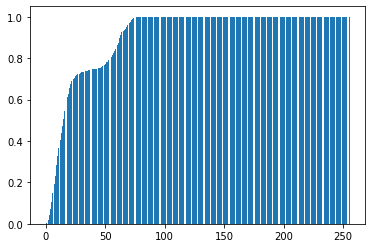

In [6]:
# TODO

"""
normalize given histogram
"""
def normalizeHist(hist):
    return hist/(width*height)

"""
Get accumulated values for each intensity
"""
def getAccHist(hist):
    accHist = np.zeros(256, dtype=int)
    for i in range( 256 ):
        sum = 0
        for j in range( i ):
            sum = sum + histogram[j]
        accHist[i] = sum
    accHist = normalizeHist(accHist)
    return accHist

accHist = getAccHist(histogram)
plt.bar(pixels,accHist) # -0.5 Achsenbeschriftung fehlt
plt.show()

3. Berechnen Sie den globalen Kontrast und die Entropie des Bildes.

In [7]:
# TODO

"""
calculate global contrast for given img
"""
def getGlobalContrast(img):
    minIntensity = np.min(img)
    maxIntensity = np.max(img)
    return (maxIntensity - minIntensity)/255

"""
calculate entropy of an image with norm. histogram
"""
normHist = normalizeHist(histogram)
def getEntropy(nHist):
    info = np.zeros(256)
    for i in range(256):
        p = nHist[i]
        if p == 0:
            break
        info[i] = p * np.log2( 1/p )
    return info.sum()

print(getEntropy(normHist))
print(getGlobalContrast(img_wagon))

5.549772325437084
0.36470588235294116


Die Grauwertspreizung ist eine lineare Transformation, welche dazu dient, Kontraste zu verstärken. Dabei wird der Grauwertbereich eines Bildes auf die gesamte zur Verfügung stehende Graupalette gestreckt.

4. Führen Sie eine Grauwertspreizung durch, indem Sie nun das Histogramm des Bildes auf das gesamte Grauwert Intervall $[0,255]$ strecken. 
    Skalieren Sie alle Grauwerte des Bildes, indem Sie folgende Formel anwenden:
$$g'(x,y)=\frac{g(x,y)-g_{\text{min}}}{g_{\text{max}}-g_{\text{min}}}\cdot 255$$

In [8]:
newImg = ((img_wagon - np.min(img_wagon))/
          (np.max(img_wagon) - np.min(img_wagon)))*255

newImg = newImg.astype(int)
# hier das neue Bild anzuzeigen hätte schon genügt ;)
"""
# save new image as jpg --> in local folder, uncomment to use
newImgFile = np.full( (458,897,3), 0, dtype='uint8')
newImgFile[:,:,0] = newImg
newImgFile[:,:,1] = newImg
newImgFile[:,:,2] = newImg
plt.imsave('test_maxContrast.jpg', newImgFile)
"""

"\n# save new image as jpg --> in local folder, uncomment to use\nnewImgFile = np.full( (458,897,3), 0, dtype='uint8')\nnewImgFile[:,:,0] = newImg\nnewImgFile[:,:,1] = newImg\nnewImgFile[:,:,2] = newImg\nplt.imsave('test_maxContrast.jpg', newImgFile)\n"

    Implementieren Sie erneut eine Histogrammerzeugung (als Datenstruktur), diesmal vom optimierten Bild.

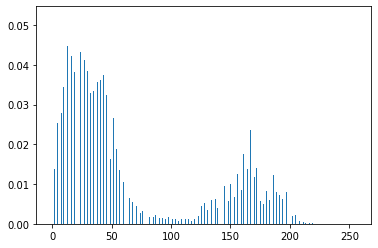

In [9]:
# TODO
histo_optimized = getHistogram(newImg)
normHistOpt = normalizeHist(histo_optimized)
# print(histo_optimized[255])
# print(getGlobalContrast(newImg))

plt.bar(pixels,normHistOpt) # -0.5 Achsenbeschriftung fehlt
plt.show()

Was geschieht mit Pixeln, die genau $g_{\text{min}}$ oder $g_{\text{max}}$ sind?

Min und Max sind quasi die neuen Grenzen, also 0 wird auf min und 255 auf max gemapped

Min: Pixelwert = 0,
Max: Pixelwert = 255